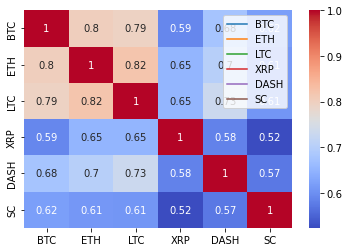

In [3]:
import pandas_datareader as web
import mplfinance as mpf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

#deutero sunthetikon twn pair pou tha usaroume
currency = "USD"
metric = "Close"

start = dt.datetime(2018,1,1)
end = dt.datetime.now()

crypto = ['BTC', 'ETH', 'LTC', 'XRP', 'DASH', 'SC']
colnames = []

first = True

for ticker in crypto:
    data = web.DataReader(f"{ticker}-{currency}", "yahoo", start, end)
    if first:
        combined = data[[metric]].copy()
        colnames.append(ticker)
        combined.columns = colnames
        first = False
    else:
        combined = combined.join(data[metric])
        colnames.append(ticker)
        combined.columns = colnames

#plt.yscale('log') #display gia to test

for ticker in crypto:
    plt.plot(combined[ticker], label=ticker)

plt.legend(loc="upper right")

#plt.show()

# # anoikse to map me heat


combined = combined.pct_change().corr(method='pearson')

sns.heatmap(combined, annot=True, cmap="coolwarm")
plt.show()